In [1]:
# Importing required libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading the required MNIST Dataset 

mnist_data = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist_data.load_data()

In [3]:
# Getting the shape of MNIST training image data

train_data.shape

(60000, 28, 28)

In [4]:
# Taking a look at the training labels

train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# Getting the shape of MNIST test image data

test_data.shape

(10000, 28, 28)

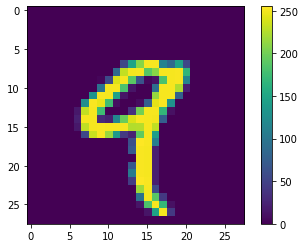

In [6]:
#Plotting an image from training dataset

plt.figure()
plt.imshow(train_data[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# Converting the colour images to black and white image

train_data = train_data / 255.0
test_data = test_data / 255.0

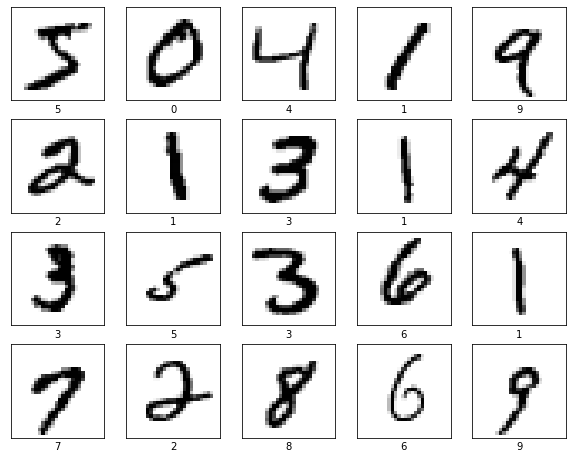

In [8]:
# Plotting top 20 black and white image with their labels

plt.figure(figsize = (10,10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap = plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [9]:
# Building a model with one dense layer of 128 input nodes and relu activation function

model1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dense(10)])

In [10]:
# Compiling the model with adam optimizer

model1.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [11]:
# Training the model with input data

model1.fit(train_data, train_labels, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2559 - accuracy: 0.9257
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1108 - accuracy: 0.9680
Epoch 3/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0776 - accuracy: 0.9769
Epoch 4/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0580 - accuracy: 0.9827
Epoch 5/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9916


In [12]:
# Finding the accuracy of the model

test_loss, test_acc = model1.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0768 - accuracy: 0.9785 - 531ms/epoch - 2ms/step

Test accuracy: 0.9785000085830688


The test accuracy is slightly lower to accuracy of training dataset. This shows that the model works pretty well. There might be some overfitting occurring.

In [13]:
probability_model = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_data)

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: color = 'blue'
  else: color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label, 100*np.max(predictions_array), true_label), color = color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

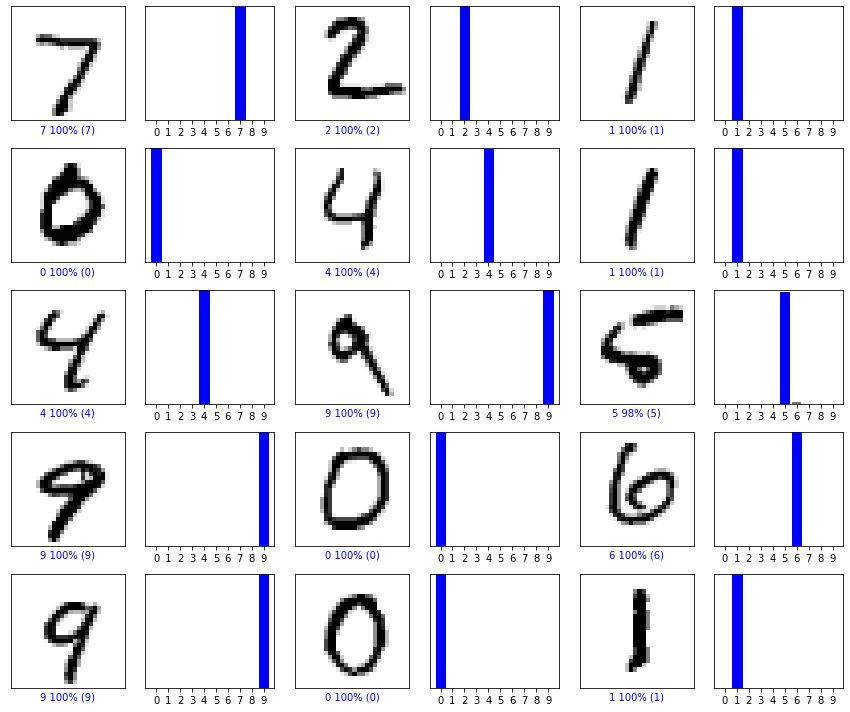

In [16]:
# Plotting the input along with their predicted values

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Second senario, adding another dense layer in the model with activation function as Sigmoid to test the accuracy of model

In [17]:
model2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), tf.keras.layers.Dense(128, activation='sigmoid'), tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dense(10)])

In [18]:
model2.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [19]:
model2.fit(train_data, train_labels, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3434 - accuracy: 0.9018
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1584 - accuracy: 0.9530
Epoch 3/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1076 - accuracy: 0.9674
Epoch 4/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0806 - accuracy: 0.9754
Epoch 5/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0612 - accuracy: 0.9805
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0490 - accuracy: 0.9847
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0388 - accuracy: 0.9877


In [20]:
test_loss2, test_acc2 = model2.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc2)

313/313 - 1s - loss: 0.0890 - accuracy: 0.9733 - 761ms/epoch - 2ms/step

Test accuracy: 0.9732999801635742


There is not much difference in the accuracies of the two models. There is not much effect of adding another dense layer of 128 nodes. Though overall, the accuracy has improved.

In [21]:
probability_model2 = tf.keras.Sequential([model2, tf.keras.layers.Softmax()])
predictions2 = probability_model2.predict(test_data)

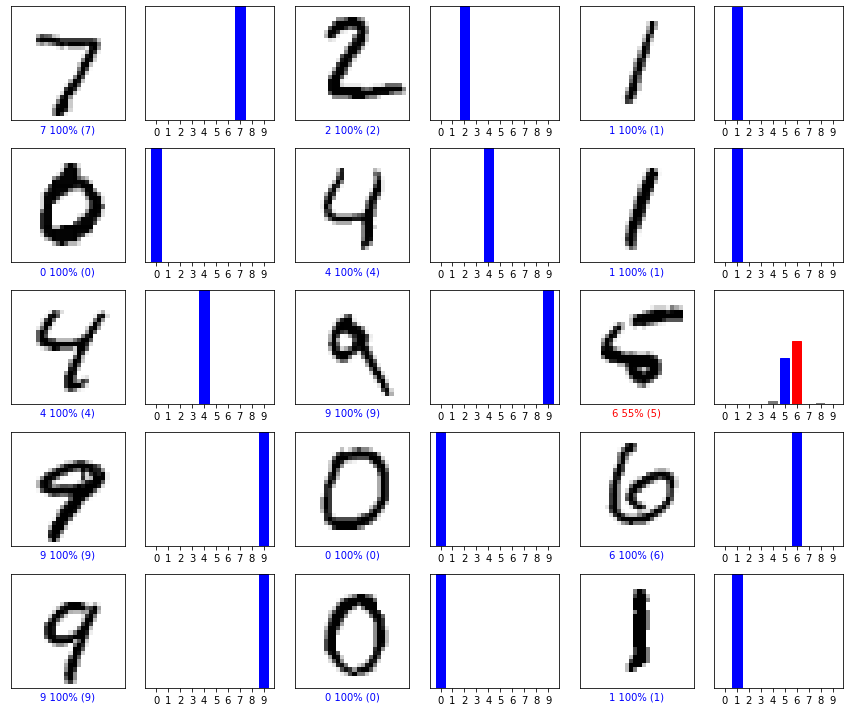

In [22]:
# Plotting the input along with their predicted values

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions2[i], test_labels, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions2[i], test_labels)
plt.tight_layout()
plt.show()

If we add another layer, then accuracy is bound to improve even if it is not by much.

In [23]:
# Implementing third model with one dense layer of 256 input nodes and sigmoid activation function

model3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), tf.keras.layers.Dense(256, activation='relu'), tf.keras.layers.Dense(10)])

In [24]:
model3.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [25]:
model3.fit(train_data, train_labels, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2300 - accuracy: 0.9329
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0932 - accuracy: 0.9717
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0601 - accuracy: 0.9814
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0435 - accuracy: 0.9863
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0317 - accuracy: 0.9901
Epoch 6/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0186 - accuracy: 0.9943


In [26]:
test_loss3, test_acc3 = model3.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc3)

313/313 - 1s - loss: 0.0745 - accuracy: 0.9803 - 585ms/epoch - 2ms/step

Test accuracy: 0.9803000092506409


As hypothesised, the accuracy did improve. The improvement in accuracy is much higher than it was when we just added 128 nodes. This might lead us to believe that accuracy is correlated to increase in number of nodes.

In [27]:
probability_model3 = tf.keras.Sequential([model3, tf.keras.layers.Softmax()])
predictions3 = probability_model3.predict(test_data)

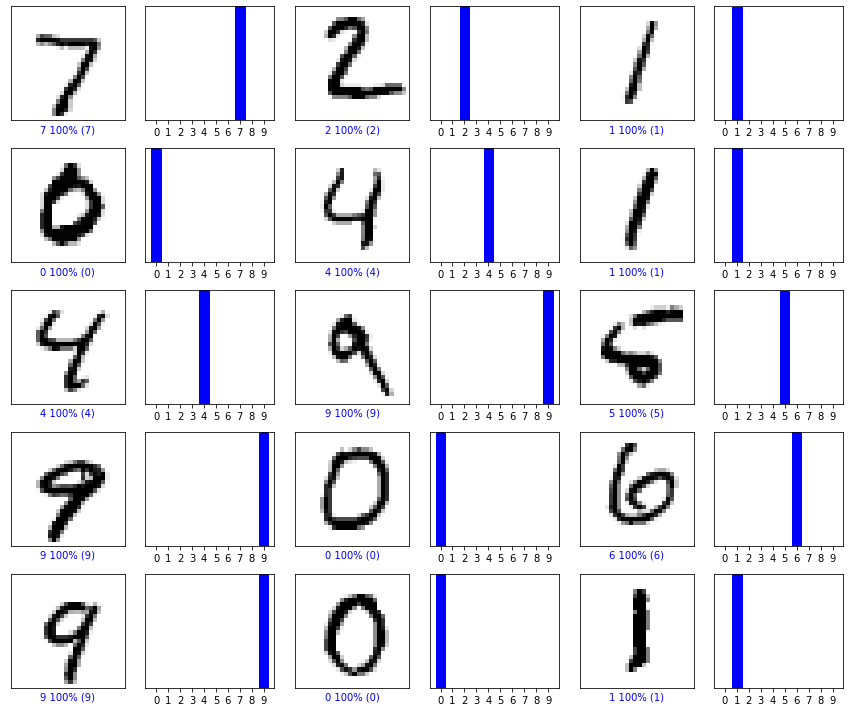

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions3[i], test_labels, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions3[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
# Compiling the previous model with SGD optimiser

model3.compile(optimizer = 'SGD', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [30]:
model3.fit(train_data, train_labels, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0100 - accuracy: 0.9973
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0074 - accuracy: 0.9982
Epoch 3/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0064 - accuracy: 0.9987
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0058 - accuracy: 0.9988
Epoch 5/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0054 - accuracy: 0.9990
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0051 - accuracy: 0.9991
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0048 - accuracy: 0.9992


In [31]:
test_loss4, test_acc4 = model3.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc4)

313/313 - 1s - loss: 0.0637 - accuracy: 0.9825 - 574ms/epoch - 2ms/step

Test accuracy: 0.9825000166893005


The training and testing accuracy of the third model with SGD optimiser went low as compared to adam optimiser. Adam optimizer performed well even with low number of nodes. Trial and error should always be done to decide the optimiser.